In [59]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/car_insurance_claim.csv')
df=df.dropna()
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
6,871024631,0,05MAY65,34.0,1,12.0,"$125,301",Yes,$0,z_No,...,Sports Car,no,$0,0,No,0,"$2,946",7.0,1,Highly Urban/ Urban


In [60]:
df.shape

(7657, 27)

In [3]:
df.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [4]:
kt=df["CLM_AMT"].tolist()

In [5]:
ks=[]
from re import sub
from decimal import Decimal
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')
for i in kt:
  ks.append(locale.atof(i.strip("$")))
df["CLM_AMT"]=ks


In [6]:
x=df[["YOJ","AGE","MVR_PTS","CLM_FREQ","CAR_AGE"]]
x

,YOJ,AGE,MVR_PTS,CLM_FREQ,CAR_AGE
0,11.0,60.0,3,2,18.0
1,11.0,43.0,0,0,1.0
2,11.0,48.0,2,0,10.0
3,10.0,35.0,3,2,10.0
6,12.0,34.0,0,0,7.0
...,...,...,...,...,...
10296,11.0,35.0,0,0,8.0
10297,9.0,45.0,2,0,17.0
10299,15.0,48.0,0,0,1.0
10300,7.0,50.0,0,0,11.0


In [7]:
y=df["CLAIM_FLAG"]
y

0        0
1        0
2        0
3        0
6        1
        ..
10296    0
10297    0
10299    0
10300    0
10301    0
Name: CLAIM_FLAG, Length: 7657, dtype: int64

In [8]:
y.value_counts()

CLAIM_FLAG
0    5598
1    2059
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_test.head()

,YOJ,AGE,MVR_PTS,CLM_FREQ,CAR_AGE
7837,8.0,47.0,0,0,11.0
8427,9.0,47.0,1,2,13.0
4910,12.0,57.0,4,1,9.0
5608,13.0,40.0,0,0,12.0
8502,11.0,49.0,3,0,5.0


In [10]:
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression(solver='liblinear')
Classifier.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

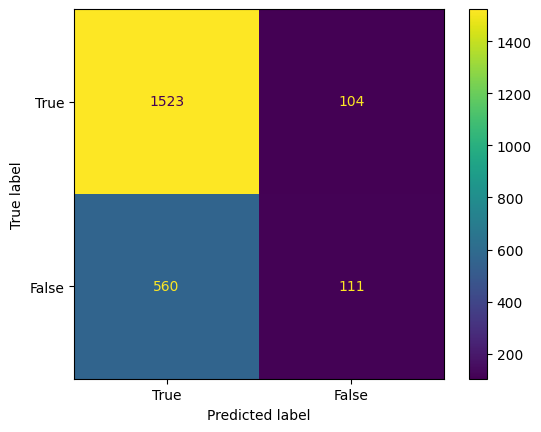

In [21]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])

cm_display.plot()
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1627
           1       0.52      0.17      0.25       671

    accuracy                           0.71      2298
   macro avg       0.62      0.55      0.54      2298
weighted avg       0.67      0.71      0.65      2298



In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

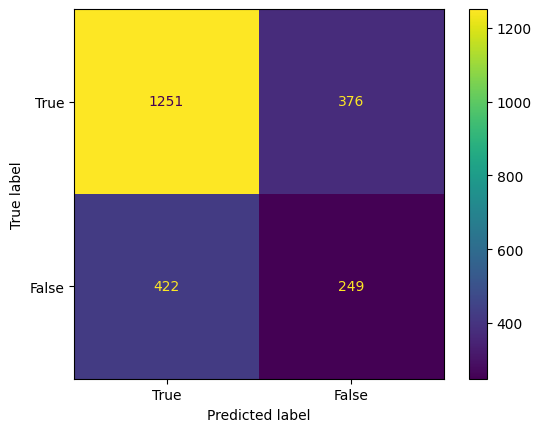

In [25]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])

cm_display.plot()
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1627
           1       0.40      0.37      0.38       671

    accuracy                           0.65      2298
   macro avg       0.57      0.57      0.57      2298
weighted avg       0.65      0.65      0.65      2298



In [29]:
from sklearn.naive_bayes import GaussianNB
np = GaussianNB()
np.fit(x_train,y_train)

GaussianNB()

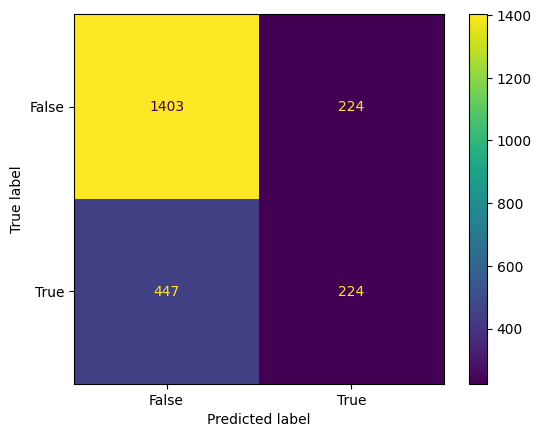

In [30]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1627
           1       0.50      0.33      0.40       671

    accuracy                           0.71      2298
   macro avg       0.63      0.60      0.60      2298
weighted avg       0.68      0.71      0.69      2298



In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)

RandomForestClassifier()

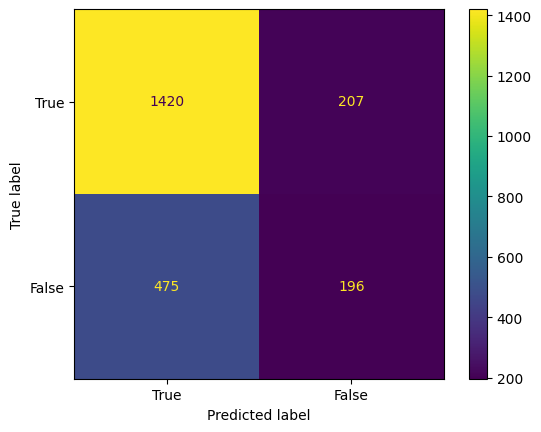

In [37]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])

cm_display.plot()
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1627
           1       0.49      0.29      0.36       671

    accuracy                           0.70      2298
   macro avg       0.62      0.58      0.59      2298
weighted avg       0.67      0.70      0.68      2298



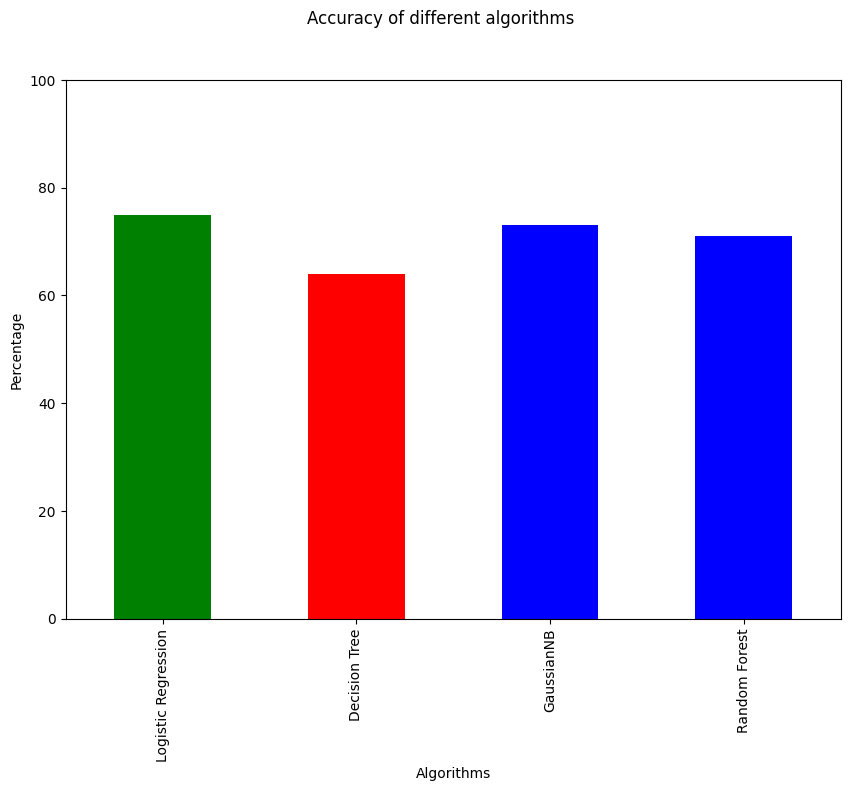

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.suptitle('Accuracy of different algorithms',fontsize=12,color='black')
plt.xlabel("Algorithms")
plt.ylabel("Percentage")
df = pd.Series({"Logistic Regression":74.95801455495427,"Decision Tree":64.0,"GaussianNB":73.0,"Random Forest":71.0})
df.plot(kind='bar',color=['g','r','b','r'],ylim=[0,100.0]);

In [41]:
feature_importances=pd.DataFrame(rf.feature_importances_,index=x_train.columns,columns=['importance']).sort_values('importance')
feature_importances

,importance
CLM_FREQ,0.114001
MVR_PTS,0.136538
CAR_AGE,0.189008
YOJ,0.223658
AGE,0.336795


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = rf.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[985 153]
 [287 107]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1138
           1       0.41      0.27      0.33       394

    accuracy                           0.71      1532
   macro avg       0.59      0.57      0.57      1532
weighted avg       0.68      0.71      0.69      1532



In [48]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [49]:
X, y = datasets.make_classification()
X_train, X_val, Y_train, Y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state=2022)
print(X_train.shape, X_val.shape)

(80, 20) (20, 20)


In [50]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(Y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(Y_val,
                             model.predict(X_val))*100)

Training Accuracy :  100.0
Validation Accuracy :  100.0


In [51]:

model = RandomForestClassifier(max_depth=2,
                               random_state=22)
model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(Y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(Y_val,
                             model.predict(X_val))*100)

Training Accuracy :  97.5
Validation Accuracy :  100.0


In [52]:
model = RandomForestClassifier(n_estimators=30,
                               random_state=22)
model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(Y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(Y_val,
                             model.predict(X_val))*100)

Training Accuracy :  100.0
Validation Accuracy :  100.0


In [54]:
model = RandomForestClassifier(
    max_depth=2, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22)

model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(
          Y_train, model.predict(X_train))*100)

print('Validation Accuracy : ', metrics.accuracy_score(
    Y_val, model.predict(X_val))*100)

Training Accuracy :  96.25
Validation Accuracy :  100.0
